In [15]:
import numpy as np
from scipy.io import wavfile
import librosa
import matplotlib.pyplot as plot
import pylab
import IPython.display as ipd
from glob import glob
import os
import pickle
import csv
import tensorflow
import librosa.display
import pandas as pd

In [5]:
largeDataset = pd.read_csv('peru_large_dataset.csv')
goodCode = ['AM-1', 'AM-2', 'AM-22', 'AM-24', 'AM-25', 'AM-26', 'AM-27', 'AM-29', 'AM-30', 'AM-6']
largeDataset = largeDataset[largeDataset['AudioMothCode'].isin(goodCode)]
largeDataset['StartDateTime']= pd.to_datetime(largeDataset['StartDateTime'])
largeDataset['StartDateTime'] = largeDataset['StartDateTime'].dt.hour

F:\Aanacondo\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
largeDataset = largeDataset[largeDataset['Global_Score'] != -1]

In [7]:
time_df = largeDataset["StartDateTime"]
scores_df = largeDataset["Global_Score"]

In [8]:
time_list = time_df.to_list()
time_list = list(dict.fromkeys(time_list))

(0.0, 24.0)

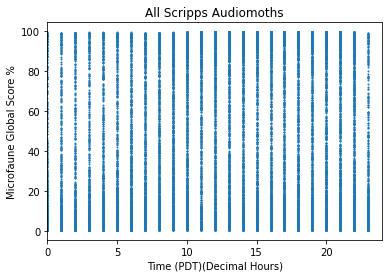

In [16]:
plot.scatter(time_df,scores_df*100,s=1)
plot.xlabel("Time (PDT)(Decimal Hours)")
plot.ylabel("Microfaune Global Score %")
plot.title("All Scripps Audiomoths")
plot.xlim(0,24)
#plot.savefig("All_Audiomoths_Scatterplot.png")

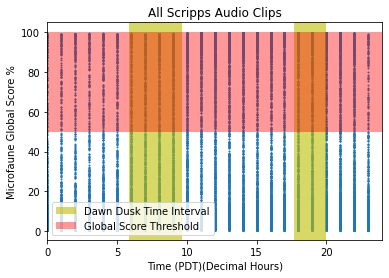

In [19]:
plot.scatter(time_df,scores_df*100,s=1)
plot.xlabel("Time (PDT)(Decimal Hours)")
plot.ylabel("Microfaune Global Score %")
plot.title("All Scripps Audio Clips")
plot.xlim(0,24)
plot.axvspan(5.83,9.67,facecolor='y',alpha=0.6)
plot.axvspan(17.67,20.0,facecolor='y',alpha=0.6, label = "Dawn Dusk Time Interval")
plot.axhspan(50,100,facecolor='r',alpha=0.4,label="Global Score Threshold")
plot.legend(loc="lower left")
plot.savefig("All_Clips_Highlight_Intersection.png")

In [20]:
time_list.sort()
averaged_score_list = []
for time in time_list:
    relevant_rows = largeDataset[largeDataset["StartDateTime"] == time]
    scores = relevant_rows["Global_Score"].to_numpy()
    average_score = np.mean(scores)*100
    averaged_score_list.append(average_score)

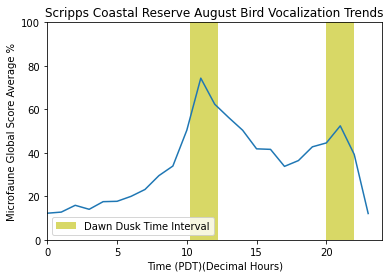

In [21]:
plot.plot(time_list,averaged_score_list)
plot.xlabel("Time (PDT)(Decimal Hours)")
plot.ylabel("Microfaune Global Score Average %")
plot.title("Scripps Coastal Reserve August Bird Vocalization Trends")
plot.ylim(0,100)
plot.xlim(0,24)
plot.axvspan(10.2,12.2,facecolor='y',alpha=0.6)
plot.axvspan(20.0,22.0,facecolor='y',alpha=0.6, label = "Dawn Dusk Time Interval")
plot.legend(loc="lower left")
#plot.savefig("Scripps_Mean_Vocalization_Trends.png")

In [22]:
largeDataset = largeDataset[((largeDataset['StartDateTime'] >= 10) & (largeDataset['StartDateTime'] <= 12)) | ((largeDataset['StartDateTime'] >= 20) & (largeDataset['StartDateTime'] <= 22))]


In [10]:
dawn = largeDataset[((largeDataset['StartDateTime'] >= 10) & (largeDataset['StartDateTime'] <= 12))].dropna(subset = ['FileName'])
dusk = largeDataset[((largeDataset['StartDateTime'] >= 20) & (largeDataset['StartDateTime'] <= 22))].dropna(subset = ['FileName'])

In [11]:
dawn = dawn.sample(120)
dusk = dusk.sample(120)

In [12]:
result = pd.concat([dawn,dusk])
result.to_csv('method3.csv')

In [13]:
fileNames = result['FileName'].tolist()

In [14]:
fileNames

['20190623_125000.WAV',
 '20190629_102000.WAV',
 '20190625_124000.WAV',
 '20190624_113000.WAV',
 '20190628_114000.WAV',
 '20190619_125000.WAV',
 '20190617_113000.WAV',
 '20190620_125000.WAV',
 '20190705_111000.WAV',
 '20190621_125000.WAV',
 '20190612_113000.WAV',
 '20190701_105000.WAV',
 '20190625_110000.WAV',
 '20190623_110000.WAV',
 '20190617_104000.WAV',
 '20190622_105000.WAV',
 '20190622_124000.WAV',
 '20190624_105000.WAV',
 '20190627_111000.WAV',
 '20190614_104000.WAV',
 '20190620_123000.WAV',
 '20190712_101000.WAV',
 '20190629_115000.WAV',
 '20190623_113000.WAV',
 '20190625_112000.WAV',
 '20190625_115000.WAV',
 '20190619_113000.WAV',
 '20190709_104000.WAV',
 '20190704_111000.WAV',
 '20190622_110000.WAV',
 '20190622_125000.WAV',
 '20190621_103000.WAV',
 '20190624_110000.WAV',
 '20190625_120000.WAV',
 '20190619_125000.WAV',
 '20190630_125000.WAV',
 '20190620_123000.WAV',
 '20190629_111000.WAV',
 '20190712_100000.WAV',
 '20190704_105000.WAV',
 '20190707_115000.WAV',
 '20190706_11300